In [1]:
import numpy as np
import pandas as pd
import os
import cv2

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf

## Gathering Data and Preprocessing stuff

In [2]:
X = []
Y = []
image_size = 256
labels = ['pituitary_tumor','no_tumor','meningioma_tumor','glioma_tumor']
for i in labels:
    folderPath = os.path.join(r"C:\Users\Acer\Downloads\BrainTumor\Training",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j),0)
        img = cv2.resize(img,(image_size,image_size))
        img = cv2.GaussianBlur(img, (5, 5), 1.0)
        img = cv2.equalizeHist(img)
        X.append(img)
        Y.append(labels.index(i))
        
for i in labels:
    folderPath = os.path.join(r"C:\Users\Acer\Downloads\BrainTumor\Testing",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j),0)
        img = cv2.resize(img,(image_size,image_size))
        img = cv2.GaussianBlur(img, (5, 5), 1.0)
        img = cv2.equalizeHist(img)
        X.append(img)
        Y.append(labels.index(i))


X = np.array(X)
Y = np.array(Y)

In [3]:
Y

array([0, 0, 0, ..., 3, 3, 3])

In [4]:
X_train = X[:2870,:]
X_test = X[2870:,:]
y_train = Y[:2870]
y_test = Y[2870:]

In [11]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [5]:
X_test.shape

(394, 256, 256)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

## Model Building

In [14]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(256,256,1)))

model.add(Conv2D(32,(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(rate=0.3))


model.add(Conv2D(64,(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(128,(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))

model.add(Dense(4, activation="softmax"))


model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 batch_normalization_5 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_6 (Batc  (None, 125, 125, 64)    

In [16]:
from keras import utils, callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=10, restore_best_weights = True)

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.1,callbacks=earlystopping)

Epoch 1/50
81/81 [==============================] - 223s 3s/step - loss: 0.7258 - accuracy: 0.7480 - val_loss: 2.2264 - val_accuracy: 0.4913
Epoch 2/50
81/81 [==============================] - 209s 3s/step - loss: 0.3770 - accuracy: 0.8753 - val_loss: 2.8402 - val_accuracy: 0.0279
Epoch 3/50
81/81 [==============================] - 215s 3s/step - loss: 0.2963 - accuracy: 0.8962 - val_loss: 0.9052 - val_accuracy: 0.6341
Epoch 4/50
81/81 [==============================] - 206s 3s/step - loss: 0.1988 - accuracy: 0.9307 - val_loss: 0.6280 - val_accuracy: 0.7666
Epoch 5/50
81/81 [==============================] - 214s 3s/step - loss: 0.1378 - accuracy: 0.9516 - val_loss: 3.2416 - val_accuracy: 0.2474
Epoch 6/50
81/81 [==============================] - 219s 3s/step - loss: 0.1056 - accuracy: 0.9640 - val_loss: 1.1040 - val_accuracy: 0.7178
Epoch 7/50
81/81 [==============================] - 205s 3s/step - loss: 0.0579 - accuracy: 0.9822 - val_loss: 1.6198 - val_accuracy: 0.5993
Epoch 8/50
81

## Evaluation

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

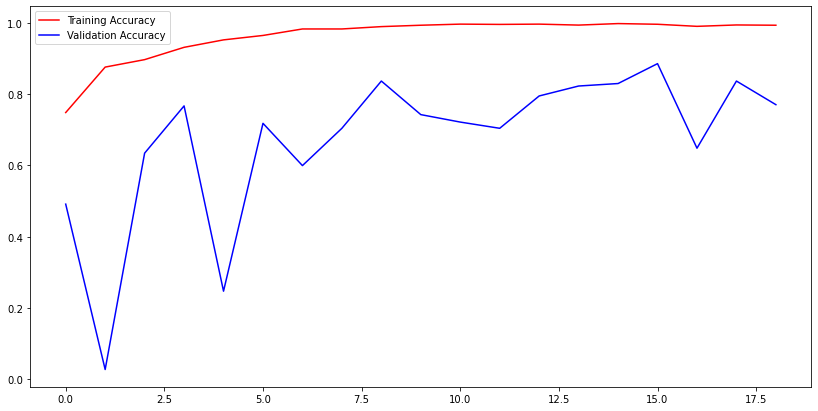

In [20]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

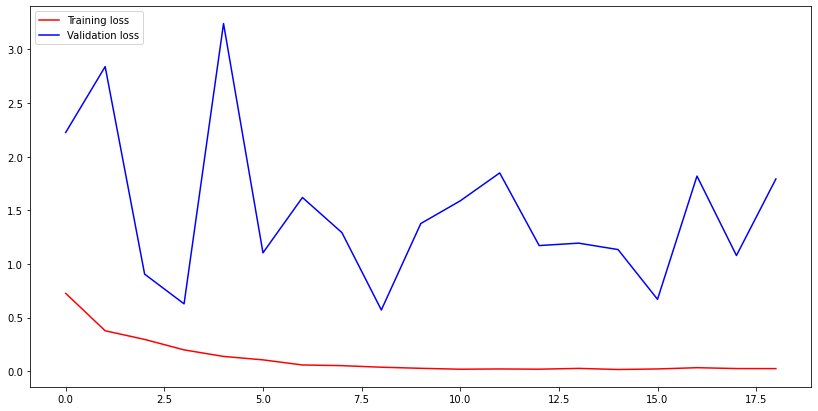

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [22]:
y_pred = model.predict(X_test)

13/13 [==============================] - 8s 609ms/step


In [23]:
y_pred_upd = [np.argmax(i) for i in y_pred] 

In [24]:
y_pred_upd

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,


In [25]:
y_test

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [26]:
y_test_upd = [np.argmax(i) for i in y_test]
y_test_upd

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_upd,y_pred_upd))
print(classification_report(y_test_upd,y_pred_upd))

[[ 55  14   5   0]
 [  0 105   0   0]
 [  0   8 106   1]
 [  4  53  29  14]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.83        74
           1       0.58      1.00      0.74       105
           2       0.76      0.92      0.83       115
           3       0.93      0.14      0.24       100

    accuracy                           0.71       394
   macro avg       0.80      0.70      0.66       394
weighted avg       0.79      0.71      0.66       394



In [ ]:
# model.save('present_model.h5')